## Introdução
Este notebook realiza uma análise exploratória sobre a educação técnica em TI, comparando a porcentagem de formandos em cursos de Ciência, Tecnologia, Engenharia e Matemática (STEM) entre diferentes países, com base nos dados do World Bank.


# Análise Exploratória dos Dados

## 1. Objetivo da Análise
Explorar os dados sobre o percentual de graduados em Ciência, Tecnologia, Engenharia e Matemática (STEM) no ensino superior, de 1998 a 2023, para entender padrões e identificar problemas nos dados.

## 2. Descrição do Conjunto de Dados
O conjunto contém dados de vários países e anos (1998-2023), com informações sobre o percentual de graduados STEM.

**Principais colunas:**
- FREQ_ID: Frequência das observações.
- REF_AREA_NAME: País ou área de referência.
- INDICATOR_NAME: Nome do indicador.
- Anos (1998-2023): Percentual de graduados por ano.

## 3. Características dos Dados
- Número de observações: 165.
- Colunas: 42, com 26 anos (1998-2023).
- Valores faltantes: Ano de 1998 com 154 valores ausentes.

## 4. Estatísticas Descritivas
- **Média e desvio padrão**: Mostram variação significativa entre os anos.
- **Valores ausentes**: 1998 tem muitos dados faltantes. Alguns anos, como 1999 e 2003, apresentam valores muito baixos (aproximadamente 0%).
- **Distribuição**: Picos de dados em torno de 0% em alguns anos, indicando dados ausentes ou incompletos.

## 5. Visualizações
Os gráficos mostram a evolução do percentual de graduados ao longo do tempo, destacando anos com mais dados e aqueles com valores extremos.

## 6. Conclusões
- **Tendências**: A maior quantidade de registros está nos anos mais recentes (2020-2023).
- **Desafios**: Muitos valores ausentes que precisam ser tratados.
  
**Próximos Passos:**
1. Tratar dados ausentes (imputação ou remoção).
2. Investigar a evolução dos graduados STEM nos últimos anos.
3. Analisar as variações entre países e anos.



In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WB_EDSTATS_UIS_FOSGP_5T8_F500600700_WIDEF.csv')

# as primeiras linhas
df.head()


,FREQ_ID,FREQ_NAME,REF_AREA_ID,REF_AREA_NAME,INDICATOR_ID,INDICATOR_NAME,UNIT_MEASURE_ID,UNIT_MEASURE_NAME,DATABASE_ID_ID,DATABASE_ID_NAME,UNIT_MULT_ID,UNIT_MULT_NAME,OBS_STATUS_ID,OBS_STATUS_NAME,OBS_CONF_ID,OBS_CONF_NAME,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,Annual,ABW,Aruba,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,34.536079,22.26277,25.694441,24.124510,13.92045,15.000000,25.306120,12.592590,22.66667,23.776220,9.82456,20.542641,13.39031,15.10297,NaN,NaN,0.00000,2.22222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Annual,AFG,Afghanistan,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.245120,NaN,NaN,NaN
2,A,Annual,AGO,Angola,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,11.469530,NaN,NaN,18.604651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.01046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Annual,ALB,Albania,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,7.03273,5.911650,NaN,6.13226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.78547,NaN,NaN,NaN,18.14513,17.72032,19.35248,20.62859,18.82147,20.110069,18.54084,20.812031,NaN
4,A,Annual,AND,Andorra,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,NaN,NaN,34.482761,45.94595,37.777779,34.920631,38.095242,NaN,23.809521,NaN,NaN,NaN,7.31707,NaN,NaN,2.12766,5.55556,3.52941,13.46154,13.58025,19.626169,7.44681,28.181820,NaN


In [80]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FREQ_ID            165 non-null    object 
 1   FREQ_NAME          165 non-null    object 
 2   REF_AREA_ID        165 non-null    object 
 3   REF_AREA_NAME      165 non-null    object 
 4   INDICATOR_ID       165 non-null    object 
 5   INDICATOR_NAME     165 non-null    object 
 6   UNIT_MEASURE_ID    165 non-null    object 
 7   UNIT_MEASURE_NAME  165 non-null    object 
 8   DATABASE_ID_ID     165 non-null    object 
 9   DATABASE_ID_NAME   165 non-null    object 
 10  UNIT_MULT_ID       165 non-null    int64  
 11  UNIT_MULT_NAME     165 non-null    object 
 12  OBS_STATUS_ID      165 non-null    object 
 13  OBS_STATUS_NAME    165 non-null    object 
 14  OBS_CONF_ID        165 non-null    object 
 15  OBS_CONF_NAME      165 non-null    object 
 16  1998               11 non-

Index(['FREQ_ID', 'FREQ_NAME', 'REF_AREA_ID', 'REF_AREA_NAME', 'INDICATOR_ID',
       'INDICATOR_NAME', 'UNIT_MEASURE_ID', 'UNIT_MEASURE_NAME',
       'DATABASE_ID_ID', 'DATABASE_ID_NAME', 'UNIT_MULT_ID', 'UNIT_MULT_NAME',
       'OBS_STATUS_ID', 'OBS_STATUS_NAME', 'OBS_CONF_ID', 'OBS_CONF_NAME',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [81]:
# ver todos os países disponíveis
print(df['REF_AREA_NAME'].unique())

# ver todos os indicadores disponíveis
print(df['INDICATOR_NAME'].unique())




['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia'
 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso'
 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bermuda' 'Brazil' 'Brunei Darussalam' 'Botswana' 'Canada'
 'Switzerland' 'Chile' 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cayman Islands'
 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Denmark' 'Dominican Republic'
 'Algeria' 'Ecuador' 'Egypt, Arab Rep.' 'Eritrea' 'Spain' 'Estonia'
 'Ethiopia' 'Finland' 'Fiji' 'France' 'United Kingdom' 'Georgia' 'Ghana'
 'Gibraltar' 'Gambia, The' 'Greece' 'Grenada' 'Guatemala' 'Guyana'
 'Hong Kong SAR, China' 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India'
 'Ireland' 'Iran, Islamic Rep.' 'Iraq' 'Iceland' 'Israel' 'Italy' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kyrgyz Republic' 'Cambodia' 'Kiribati'
 'Korea, Rep.'

In [82]:
pais = 'Brazil'
indicador = 'Percentage of graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, (%)'


In [83]:
df_filtrado = df[(df['REF_AREA_NAME'] == pais) & (df['INDICATOR_NAME'] == indicador)]


In [84]:
# Verificar se há NaN em alguma coluna
print(df.isnull().sum())


FREQ_ID                0
FREQ_NAME              0
REF_AREA_ID            0
REF_AREA_NAME          0
INDICATOR_ID           0
INDICATOR_NAME         0
UNIT_MEASURE_ID        0
UNIT_MEASURE_NAME      0
DATABASE_ID_ID         0
DATABASE_ID_NAME       0
UNIT_MULT_ID           0
UNIT_MULT_NAME         0
OBS_STATUS_ID          0
OBS_STATUS_NAME        0
OBS_CONF_ID            0
OBS_CONF_NAME          0
1998                 154
1999                 112
2000                 107
2001                 107
2002                 104
2003                 111
2004                 105
2005                 109
2006                 112
2007                 101
2008                  95
2009                  98
2010                  98
2011                 103
2012                 103
2013                 128
2014                 116
2015                  69
2016                  69
2017                  78
2018                  72
2019                  65
2020                  64
2021                  79


In [85]:
# Remover colunas com mais de 50% de valores faltantes
df_clean = df.dropna(thresh=len(df)*0.5, axis=1)


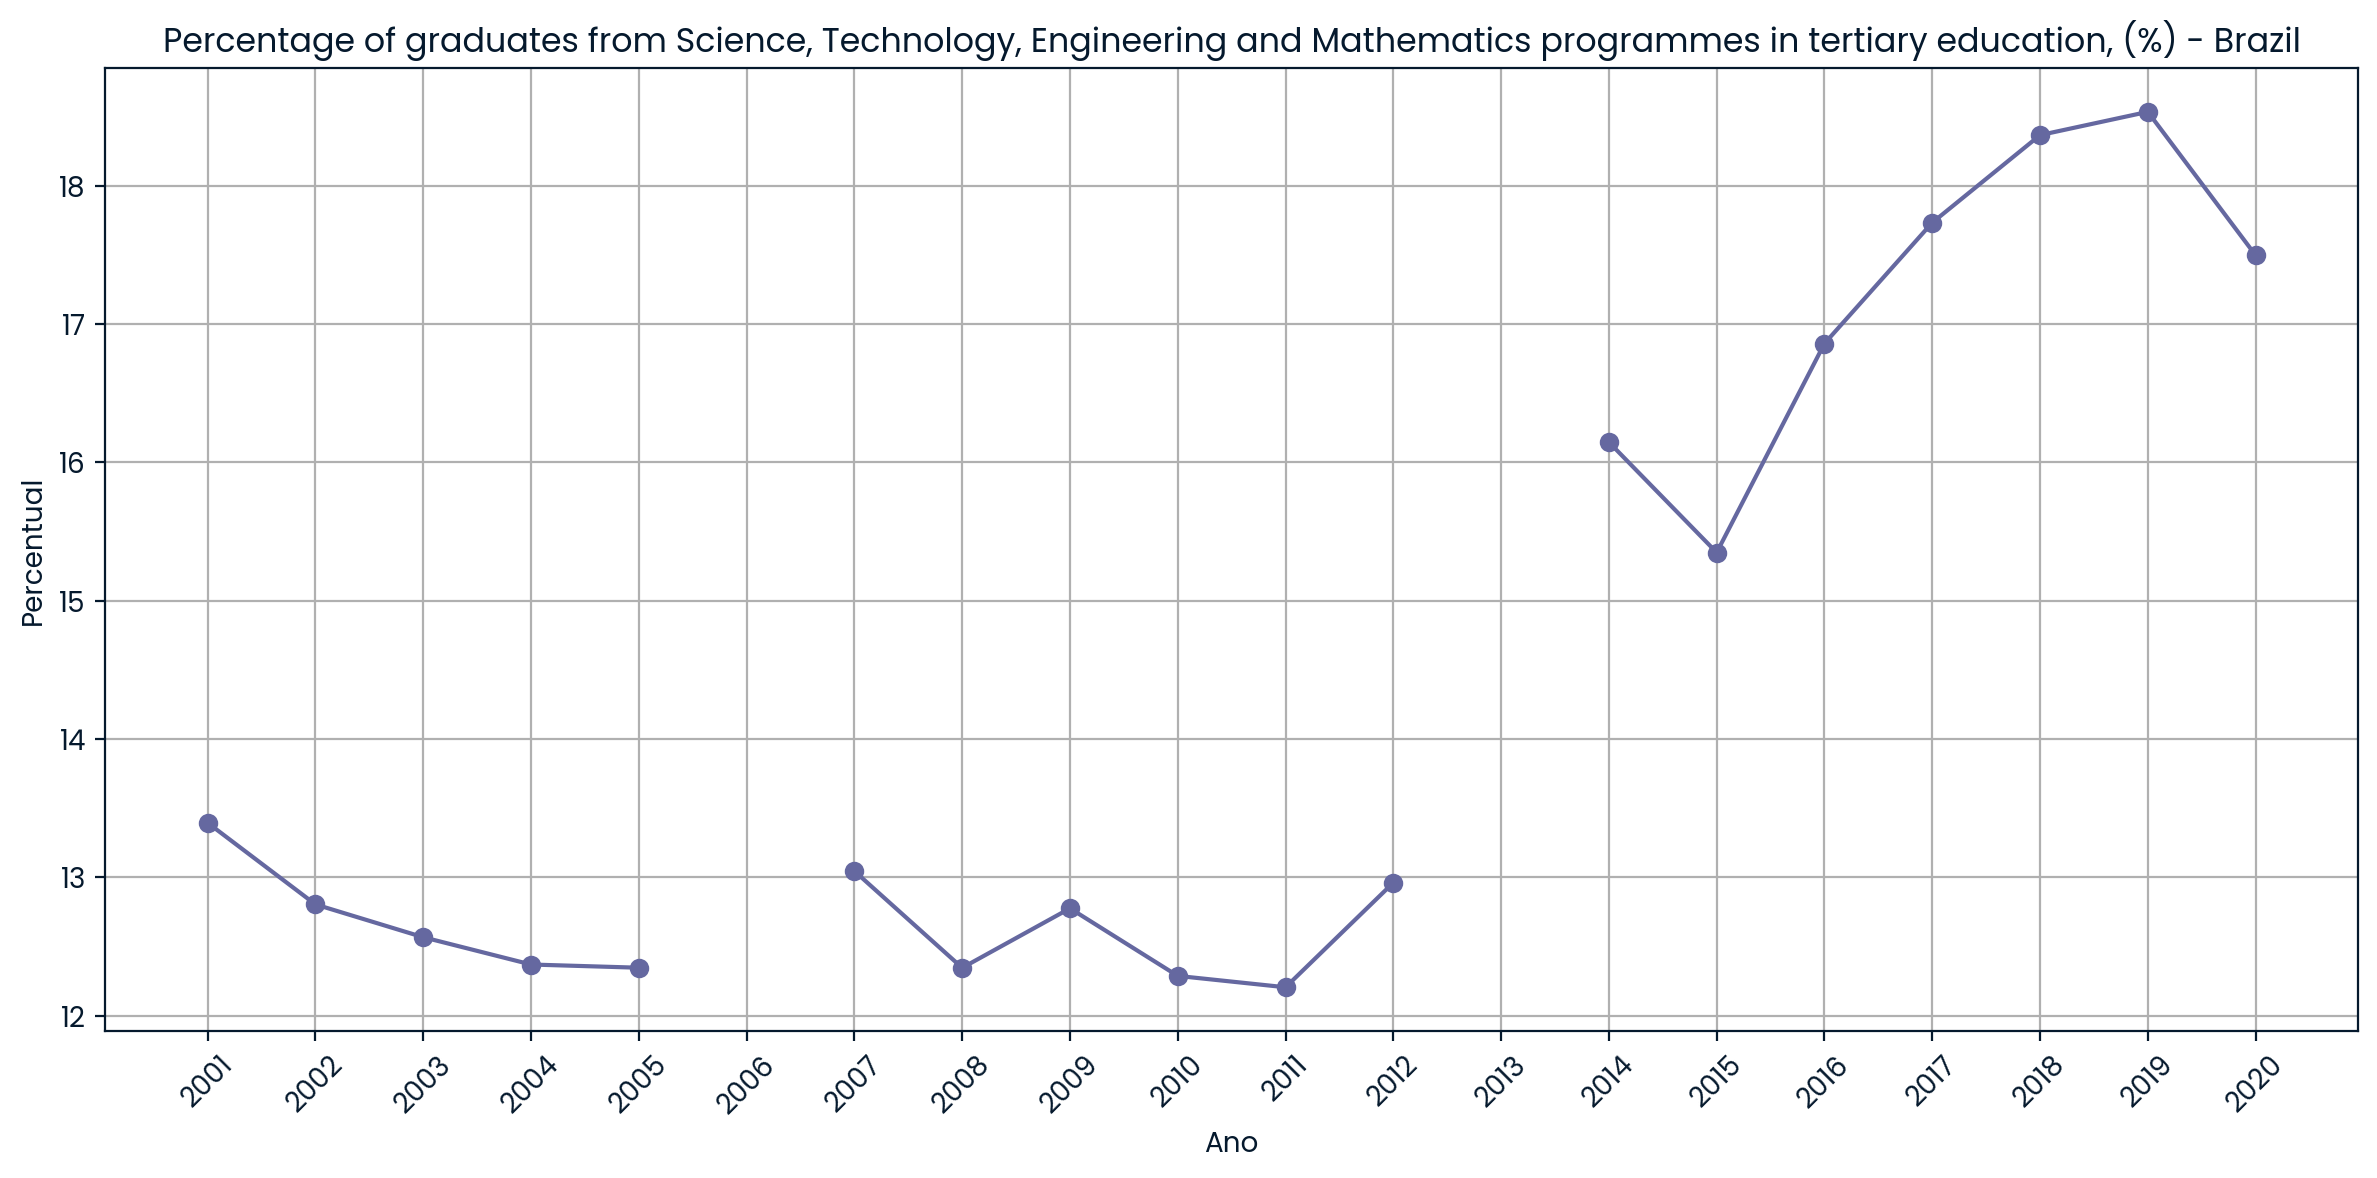

In [86]:
import matplotlib.pyplot as plt

# Seleciona só as colunas de ano (numéricas)
colunas_ano = [col for col in df_filtrado.columns if col.isdigit()]
valores = df_filtrado[colunas_ano].values.flatten()

# Cria o gráfico
plt.figure(figsize=(12, 6))
plt.plot(colunas_ano, valores, marker='o')
plt.title(f'{indicador} - {pais}')
plt.xlabel('Ano')
plt.ylabel('Percentual')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
# estatísticas descritivas
print(df.describe())


       UNIT_MULT_ID       1998       1999  ...       2021       2022       2023
count         165.0  11.000000  53.000000  ...  86.000000  48.000000   4.000000
mean            0.0  18.255931  19.569376  ...  22.676848  24.379479  19.135805
std             0.0  19.369321  11.651284  ...   7.127525   8.854132  13.999377
min             0.0   0.000000   0.000000  ...   0.000000   0.000000   0.000000
25%             0.0   0.000000  14.016170  ...  18.578747  19.096190  13.380412
50%             0.0  22.262060  20.656139  ...  22.760916  25.313975  22.403419
75%             0.0  29.657214  25.094650  ...  27.418690  29.602720  28.158812
max             0.0  52.500000  45.639561  ...  39.473579  40.232449  31.736380

[8 rows x 27 columns]


In [88]:
-- Explore the data in the table
SELECT *
FROM 'WB_EDSTATS_UIS_FOSGP_5T8_F500600700_WIDEF.csv'


,FREQ_ID,FREQ_NAME,REF_AREA_ID,REF_AREA_NAME,INDICATOR_ID,INDICATOR_NAME,UNIT_MEASURE_ID,UNIT_MEASURE_NAME,DATABASE_ID_ID,DATABASE_ID_NAME,UNIT_MULT_ID,UNIT_MULT_NAME,OBS_STATUS_ID,OBS_STATUS_NAME,OBS_CONF_ID,OBS_CONF_NAME,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,Annual,ABW,Aruba,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,34.536079,22.262770,25.694441,24.124510,13.92045,15.000000,25.306120,12.592590,22.666670,23.776220,9.824560,20.542641,13.39031,15.102970,NaN,NaN,0.00000,2.222220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Annual,AFG,Afghanistan,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.245120,NaN,NaN,NaN
2,A,Annual,AGO,Angola,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,11.469530,NaN,NaN,18.604651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.01046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Annual,ALB,Albania,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,7.032730,5.911650,NaN,6.13226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.78547,NaN,NaN,NaN,18.14513,17.720320,19.35248,20.628590,18.821470,20.110069,18.540840,20.812031,NaN
4,A,Annual,AND,Andorra,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,NaN,NaN,34.482761,45.94595,37.777779,34.920631,38.095242,NaN,23.809521,NaN,NaN,NaN,7.317070,NaN,NaN,2.12766,5.555560,3.52941,13.461540,13.580250,19.626169,7.446810,28.181820,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,A,Annual,VGB,British Virgin Islands,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.896549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.260681,35.193802,NaN
161,A,Annual,VNM,Viet Nam,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.253880,NaN,20.464331,19.764120,19.757339,16.762470,NaN,24.049200,NaN,NaN,23.41543,22.675480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,A,Annual,WSM,Samoa,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,52.5,43.406590,24.384239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.31559,9.317800,8.078990,7.295370,6.382980,NaN,NaN
163,A,Annual,ZAF,South Africa,WB_EDSTATS_UIS_FOSGP_5T8_F500600700,"Percentage of graduates from Science, Technolo...",SHARE,Share (proportion),WB_EDSTATS,Education Statistics,0,Units,A,Normal value,PU,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5515,19.58884,18.485069,18.57234,18.281191,18.326719,17.412420,18.710630,NaN,NaN
